In [1]:
# Import libraries for preprocessing, modeling, and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.impute import SimpleImputer




In [2]:
# Load cleaned pitchers dataset and cast award fields to categorical types
pitchers = pd.read_csv('c:\\Users\\josep\\Portfolio\\DS6021\\DS6021-Project\\data\\cleaned\\final_pitchers_df.csv')
pitchers['won_mvp'] = pitchers['won_mvp'].astype('category')
pitchers['won_gold_glove'] = pitchers['won_gold_glove'].astype('category')
pitchers['won_cy_young'] = pitchers['won_cy_young'].astype('category')
pitchers['position'] = pitchers['position'].astype('category')
pitchers['won_silver_slugger'] = pitchers['won_silver_slugger'].astype('category')
pitchers['all_star'] = pitchers['all_star'].astype('category')

In [3]:
# Select features/target for pitching data and define dropped columns
pitchers_clean = pitchers.dropna(subset=["free_agent_salary"])
X = pitchers_clean.drop(columns=["row_id", "playerID","year","free_agent_salary",
                          "ZR","position",'H',
 'BFP',
 'R',
 'GIDP',
 'ERA',
 'PB',
 'WP.1',
 'won_cy_young',
 'won_mvp',
 'won_gold_glove',
 'won_silver_slugger',
 'all_star'])
y = pitchers_clean["free_agent_salary"]

In [4]:
# Impute, scale, and tune the KNN regressor on the pitching dataset
imputer = SimpleImputer(strategy="median")
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
imputer = SimpleImputer(strategy="median")
X_train_imputed = imputer.fit_transform(X_train_raw)
X_test_imputed  = imputer.transform(X_test_raw)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled  = scaler.transform(X_test_imputed)

knn = KNeighborsRegressor()
param_grid = {"n_neighbors":[3,5,7,9,11], "weights":["uniform","distance"]}
grid = GridSearchCV(knn, param_grid, cv=5, scoring="neg_mean_squared_error")
grid.fit(X_train_scaled, y_train)

y_pred = grid.predict(X_test_scaled)

In [5]:
# Report best hyperparameters and evaluate KNN performance
print("Best KNN params:", grid.best_params_)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.5f}")
print(f"Test R^2: {r2:.5f}")

Best KNN params: {'n_neighbors': 3, 'weights': 'distance'}
Test MSE: 5766524375093.73828
Test R^2: 0.59159


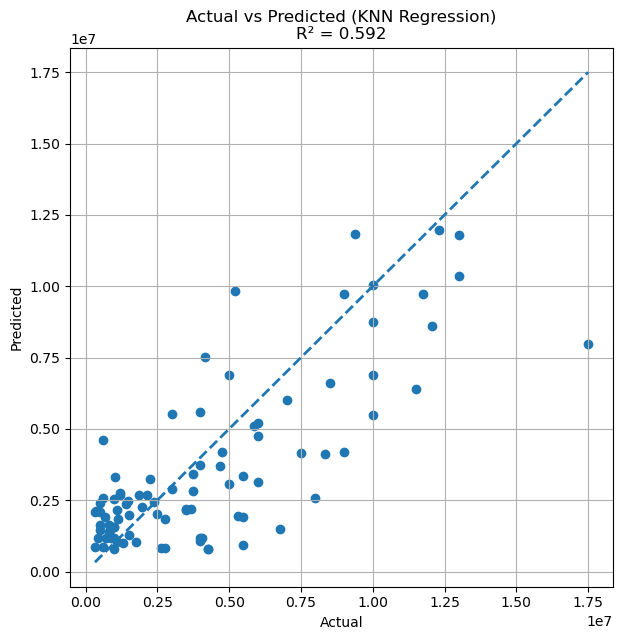

In [6]:
# Plot predicted versus actual salaries for the KNN pitching model
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', linewidth=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted (KNN Regression)\nR² = {r2:.3f}")
plt.grid(True)
plt.show()

Our test r^squared of 0.592 indicates that our model does an okay job of predicting free agent salaries, explaining almost 60% of the variation. Our model MSE demonstrates that on average, our model misclassifies salaries by about $2.4 million dollars. Considering the magnitude of some contracts, this seems reasonable. Looking at our predicted vs average graph, it seems that our model does a decent job of predicting salaries throughout the salary ranges, but seems to overestimate salaries in the upper ranges. Our best K being 3 indicates that our data benefits from a model that is fairly local, giving more weight to the closest few points.